In [4]:
import urllib.request
import os
import shutil
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## Zapoznanie się z zestawami danych.


### MNIST

http://yann.lecun.com/exdb/mnist/

Musimy zacząć od pobrania i zdekowania danych. Można zrobic to np. na piechotę:

In [33]:
mnist_prefix = "./mnist"
shutil.rmtree(mnist_prefix)
os.mkdir(mnist_prefix)
base_url = "http://yann.lecun.com/exdb/mnist/"
datasets = ["train-labels-idx1-ubyte.gz", "train-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz"]

In [34]:
def fetch_gz(base_url, name):
    path = "{}/{}".format(mnist_prefix, name)
    urllib.request.urlretrieve("{}{}".format(base_url, name), path)
    data_file = gzip.open(path, "rb")
    data = data_file.read()
    data_file.close()
    return data

In [35]:
def decode_mnist(data):
    magic_number = int.from_bytes(data[0:4], byteorder='big')
    if magic_number == 2051:
        number_of_images = int.from_bytes(data[4:8], byteorder='big')
        rows = int.from_bytes(data[8:12], byteorder='big')
        columns = int.from_bytes(data[12:16], byteorder='big')
        print("File contains {} images {}x{}".format(number_of_images, rows, columns))
        pixels = [int(b) for b in data[16:]]
        return np.array(pixels).reshape((number_of_images, rows, columns))
    elif magic_number == 2049:
        number_of_labels = int.from_bytes(data[4:8], byteorder='big')
        print("File contain {} labels".format(number_of_labels))
        return [int(b) for b in data[8:]]

In [36]:
(train_labels, train_images, test_labels, test_images) = [decode_mnist(fetch_gz(base_url, ds)) for ds in datasets]

File contain 60000 labels
File contain 60000 images 28x28
File contain 10000 labels
File contain 10000 images 28x28


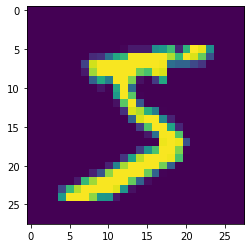

In [37]:
plt.imshow(train_images[0])

In [39]:
train_labels[0]

5

Lub w bardziej cywilizowany sposób używając gotowych funkcji bibliotek i pobierając dane np z openml (https://www.openml.org/search?type=data):

In [5]:
mnist = fetch_openml("mnist_784")

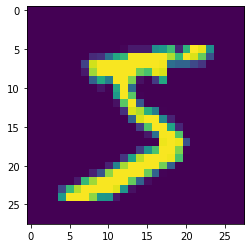

In [9]:
plt.imshow(np.array(mnist.data[0]).reshape(28,28))

### Fashion-MNIST

https://github.com/zalandoresearch/fashion-mnist

In [11]:
fmnist = fetch_openml("Fashion-MNIST")

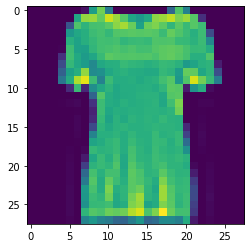

In [17]:
plt.imshow(np.array(fmnist.data[10]).reshape(28,28))

### CIFAR-10
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
cifar10 = fetch_openml("CIFAR_10")

In [ ]:
plt.imshow(np.array(cifar10.data[623]).reshape(32,32,3).astype(int))

### SmallNorb

https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/

### TNG
https://github.com/RMHogervorst/TNG

## Procedury normalizujące dane i wybierające dane ze zbioru danych.

TODO: opis procedur

In [14]:
print("TODO: przykładowe wywołania poleceń")

TODO: przykładowe wywołania poleceń


## Algorytm k-NN

TODO: opis algorytmu

TODO: realizacja pythonowa

In [15]:
print("TODO: przykładowe wywołania poleceń")

TODO: przykładowe wywołania poleceń


## Miary jakości klasyfikatora

- cross validation (scikit learn)
- leave-one-out

przykładowy dataset:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [16]:
print("TODO: czy tutaj dać jakieś polecenia?")

TODO: czy tutaj dać jakieś polecenia?


## Zmiana miary jakości w zależności od zmniejszenia zbioru uczącego 
(stosunek dane uczące -> testowe)

In [17]:
print("TODO: przykładowe wywołania poleceń z opisem argumentów + zadanie czy można poprawić jakość")

TODO: przykładowe wywołania poleceń z opisem argumentów + zadanie czy można poprawić jakość


## Regularyzacja zbioru z małą ilością danych przez augmentację

TODO: pokazać jak zmieniają się miary jakości przy różnym stopniu nasilenia augmentacji (np interpolowanie zbioru punktami między już istniejącymi)

In [18]:
print("TODO: przykładowe wywołania poleceń")

TODO: przykładowe wywołania poleceń


## Procedury augmentacyjne z imgaug

TODO: 3-4 przykłady z imgaug

https://github.com/aleju/imgaug

Najlepiej w postaci samouczka z gotowymi poleceniami, więc tak z 5-6 komórek z paroma przykładami by pokazać jak się toto zachowuje przy różnych argumentach na różnych zbiorach danych (np 3 różne argumenty na 2 zbiory)

In [19]:
print("TODO: przykładowe wywołania poleceń, tym razem najlepiej w osobnych komórkach")

TODO: przykładowe wywołania poleceń, tym razem najlepiej w osobnych komórkach


## TODO: przygotować zadanie z imgaug na podstawie powyższych
by dało się w miarę bez googlowania je zrobić w miarę krótkim czasie - jest na to 50 min